## Problem Statement

About the Dataset
- Age : Describes the age of individuals. Continuous.
- Workclass : Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt : Continuous.
- education : Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [68]:
data = pd.read_csv("adult.csv")

In [4]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
## check the null values in the dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
## check duplicate value in data set
data.duplicated().sum()

24

In [69]:
# drop duplicate value from data
data.drop_duplicates(inplace=True)

In [14]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
# separate catigorical and numerical features
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [17]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [18]:
numerical_features 


Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [19]:
data['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [20]:
## fetch the unique value from categorical value
for i in categorical_features:
    print(i,data[i].unique())
    
    print()
    print("*****************************Seperated_Columns********************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*****************************Seperated_Columns********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*****************************Seperated_Columns********************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*****************************Seperated_Columns********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

*****************************Seperated_Columns*****************

In [21]:
data['occupation'].value_counts()


occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [24]:
data['native.country'].value_counts()

native.country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [71]:
# remove ? and replace with mode value # .mode()
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["native_country"] = data["native.country"].replace(" ?"," United-States")

## Data Visualization

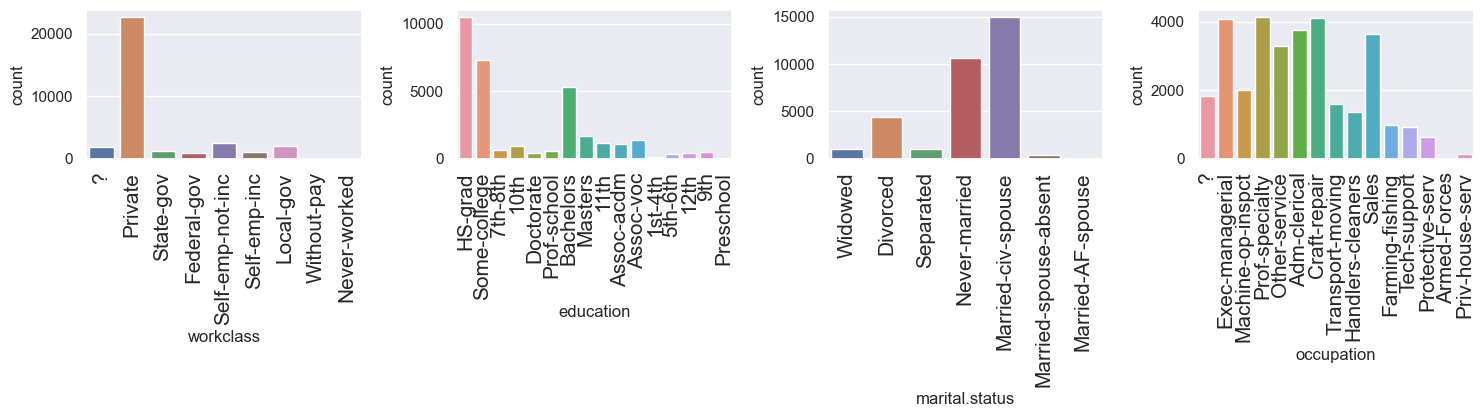

In [27]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

columns1 = ['workclass', 'education', 'marital.status', 'occupation']

for i in range(0,len(columns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[columns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

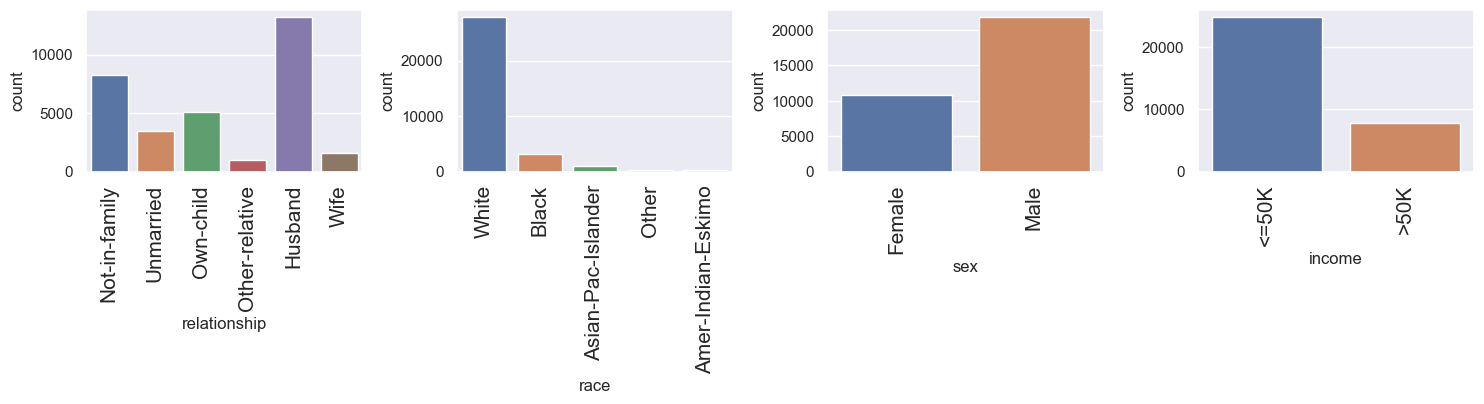

In [28]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()
    

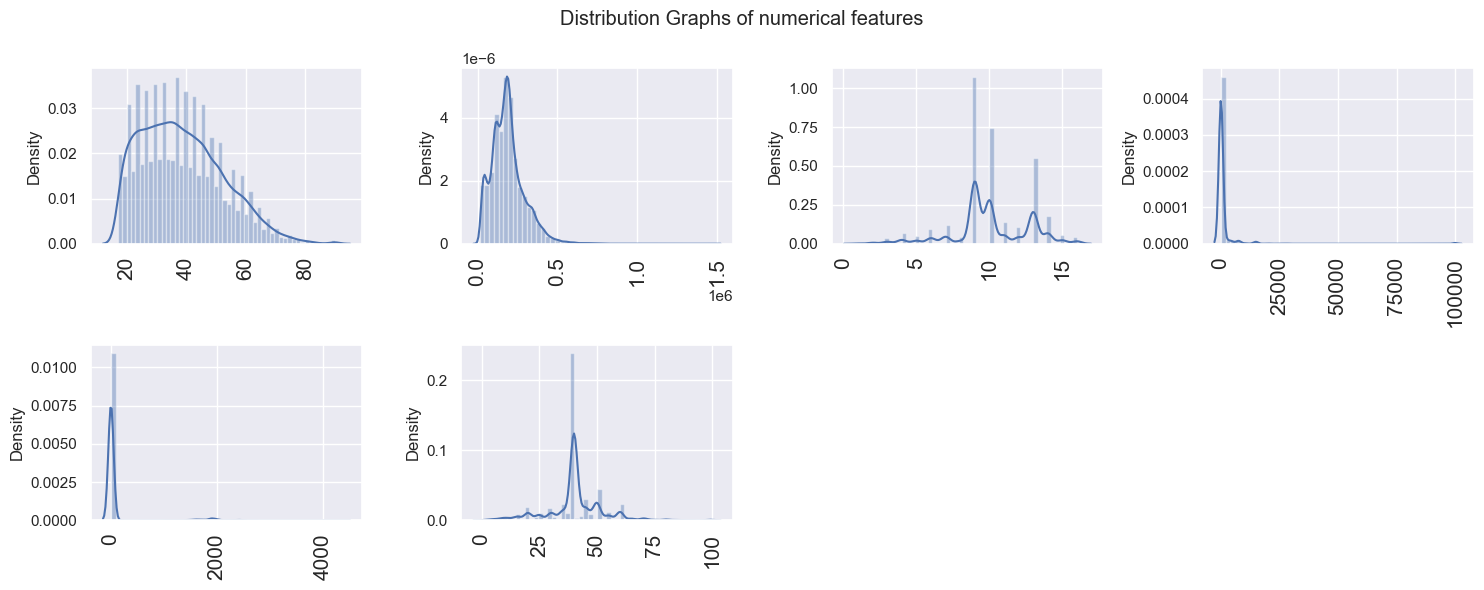

In [29]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

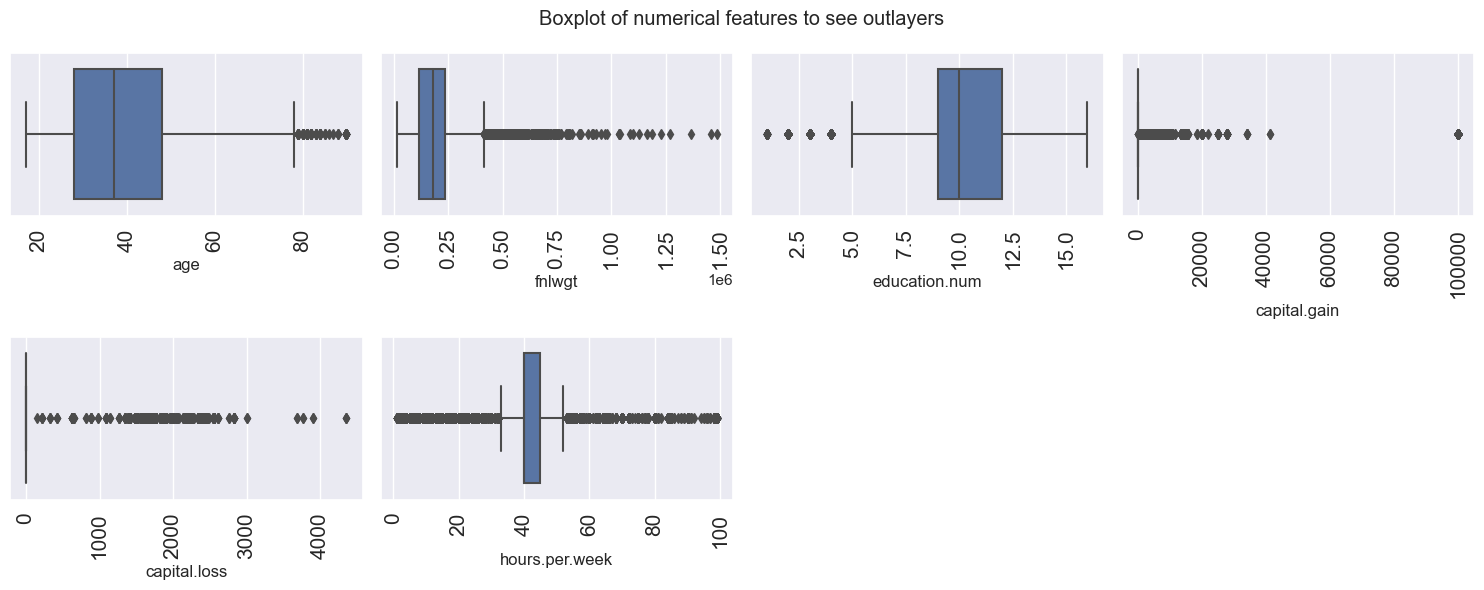

In [30]:
plt.suptitle("Boxplot of numerical features to see outlayers")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [31]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,United-States


<Axes: xlabel='income'>

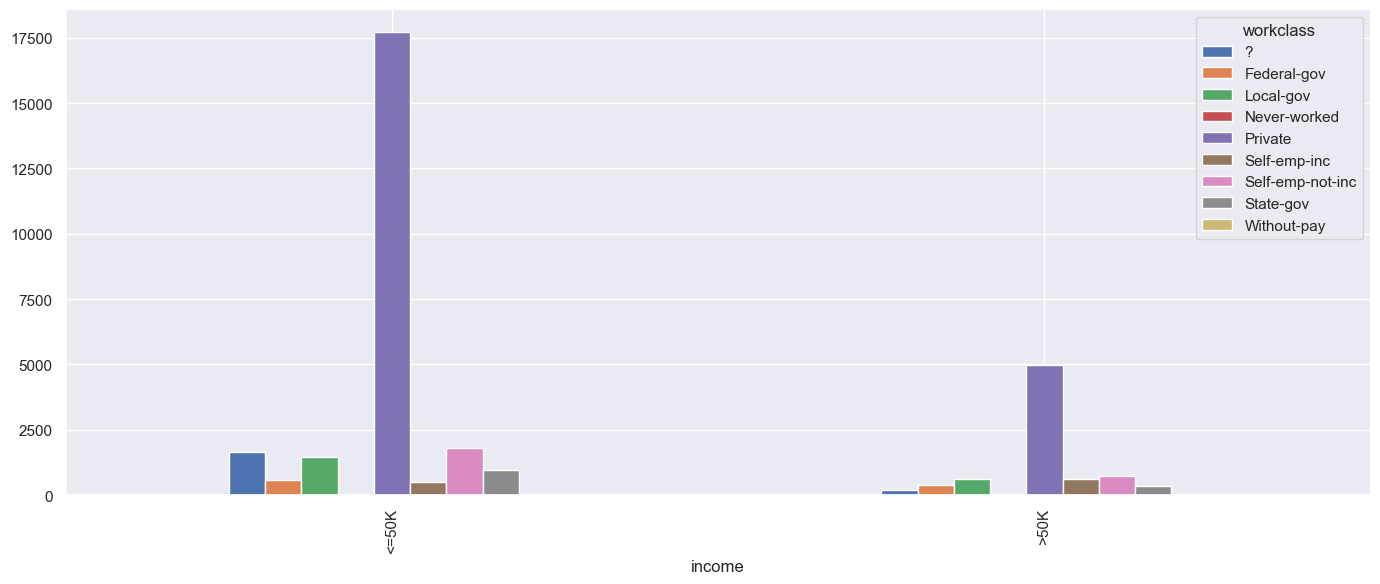

In [34]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

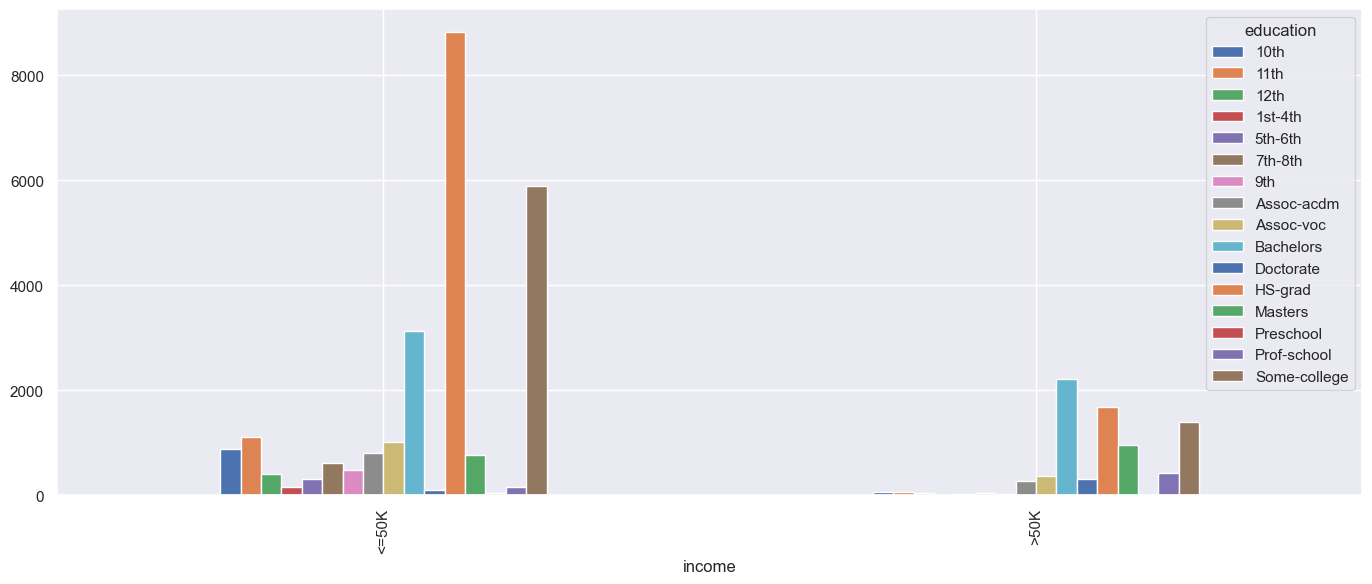

In [35]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

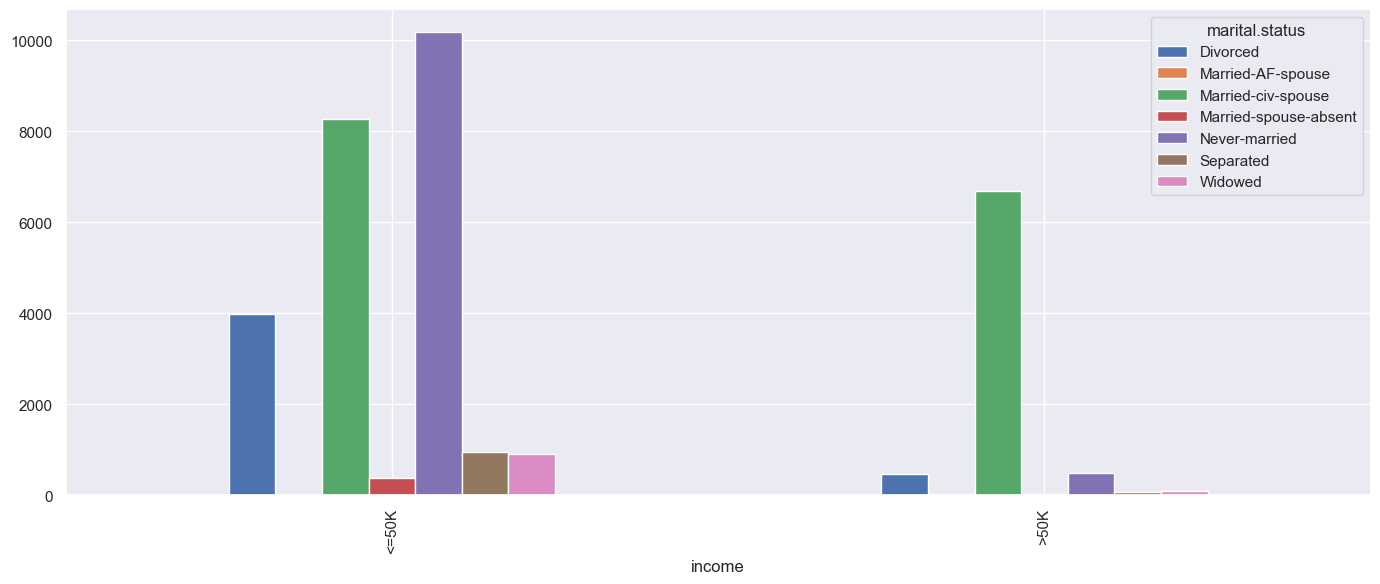

In [36]:
marital_status = pd.crosstab(data['income'],data['marital.status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

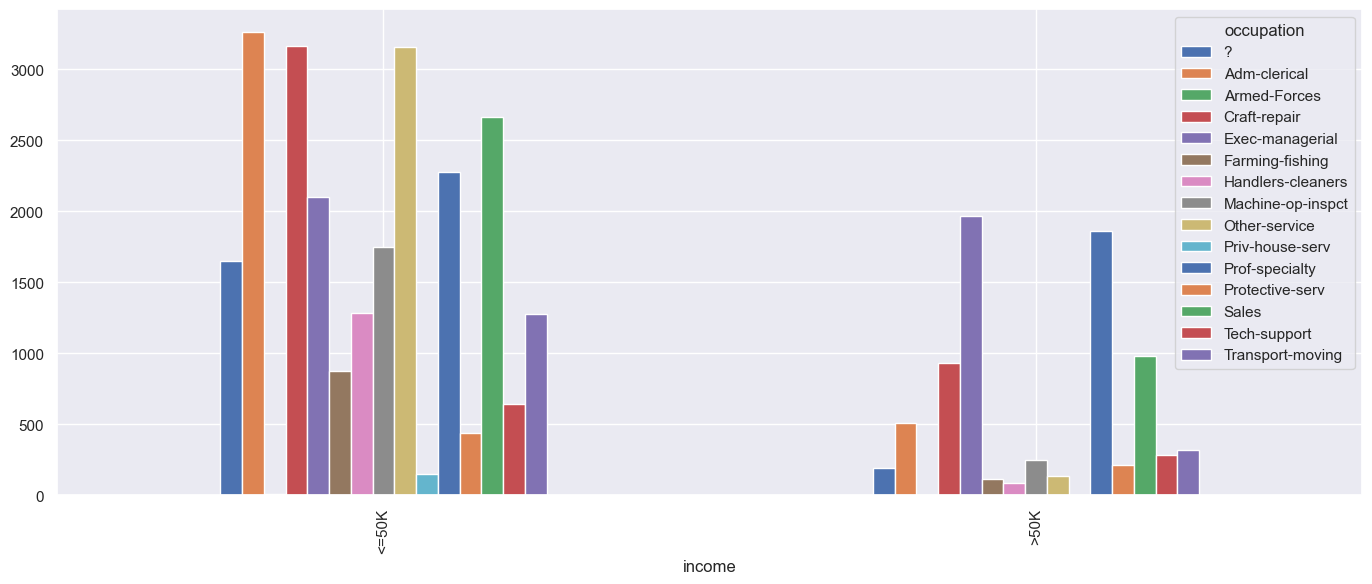

In [37]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

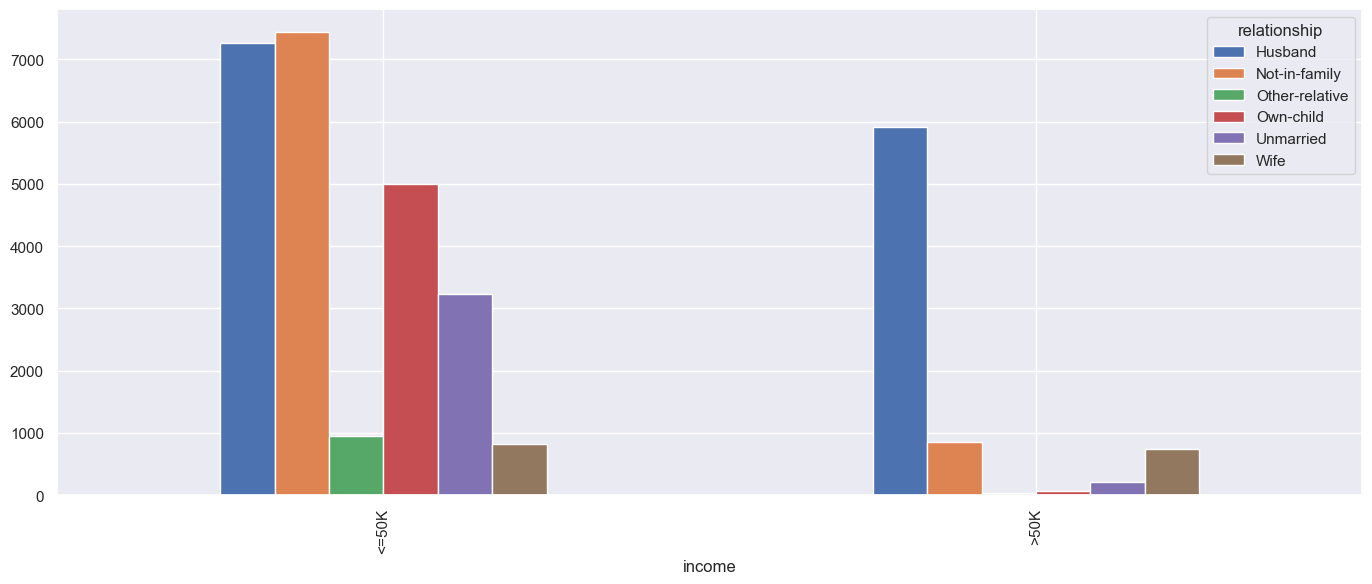

In [38]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

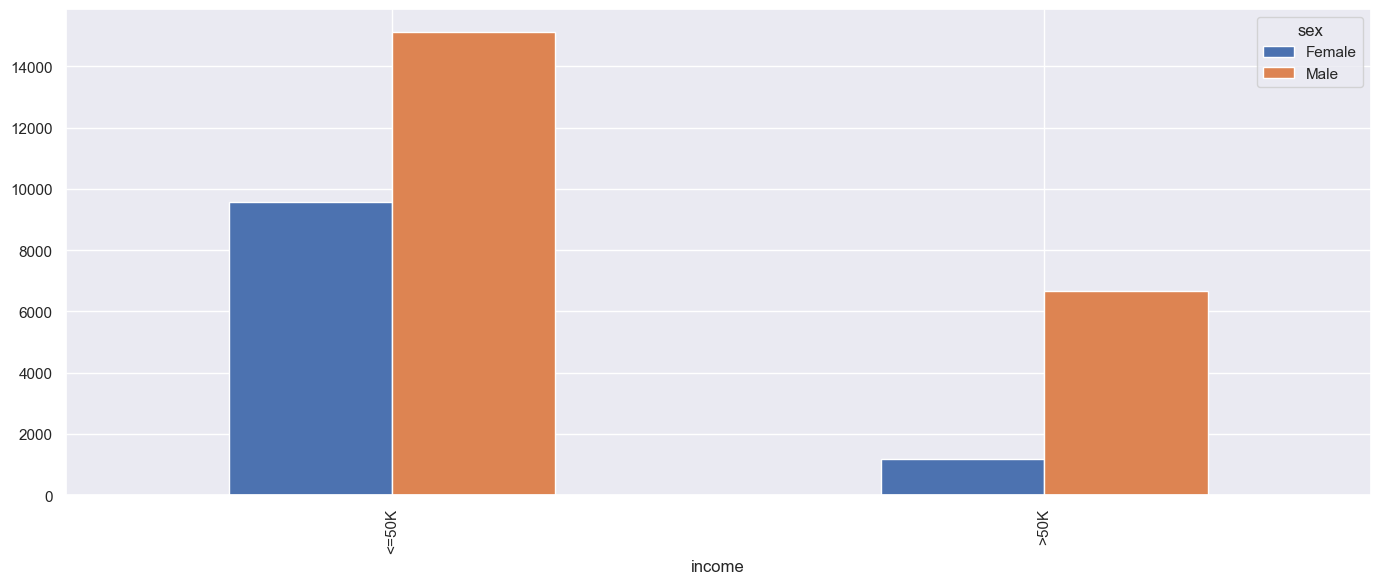

In [39]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [41]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [42]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,United-States
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,United-States


In [72]:
from sklearn.preprocessing import LabelEncoder

#create a label encoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [74]:
data['income'] = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)

In [75]:
data['native.country'] = le.fit_transform(data['native.country'])

<Axes: >

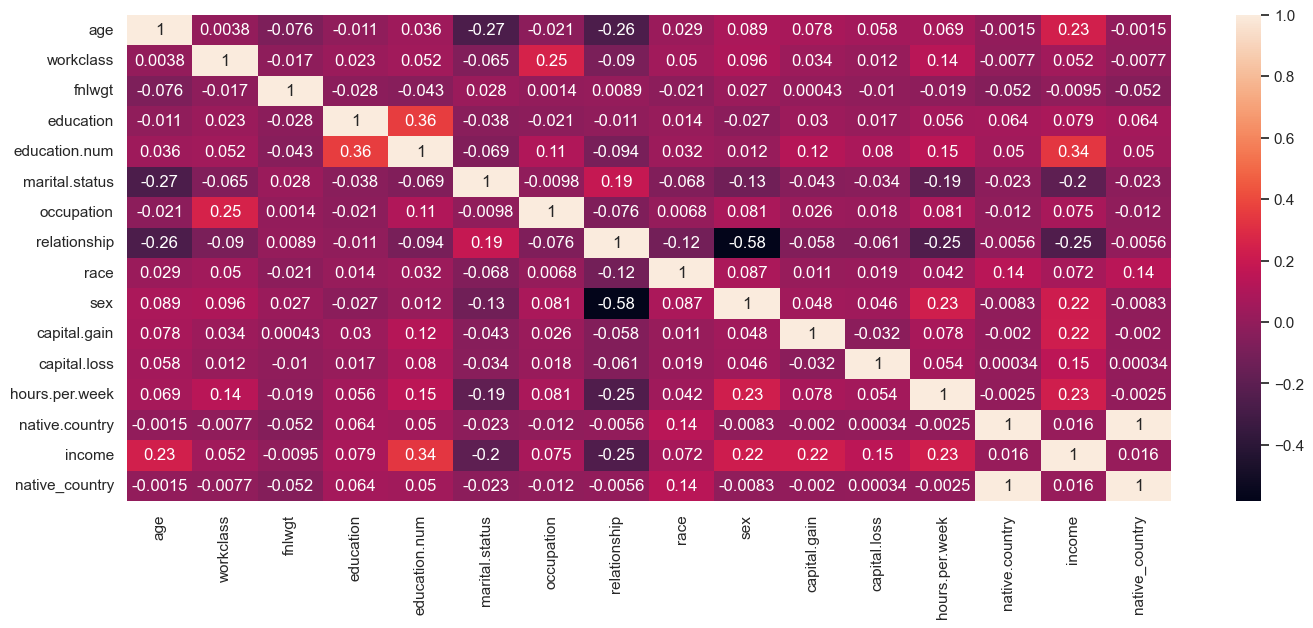

In [76]:
sns.heatmap(data.corr(),annot=True)

In [64]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [66]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,native_country
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,NaN,39
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,NaN,39
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,NaN,39
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,NaN,39
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,NaN,39


In [78]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [77]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt", "native.country"],axis=1,inplace=True)

In [80]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,native_country
0,90,0,9,6,0,1,4,0,0,4356,40,0,39
1,82,4,9,6,4,1,4,0,0,4356,18,0,39
2,66,0,10,6,0,4,2,0,0,4356,40,0,39
3,54,4,4,0,7,4,4,0,0,3900,40,0,39
4,41,4,10,5,10,3,4,0,0,3900,40,0,39


In [81]:
data.to_csv("cleandata.csv",index=False)

## Model Training

In [82]:
data.shape


(32537, 13)

In [83]:
## separate dependent and independent features
x = data.drop("income",axis=1)
y = data["income"]

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
## pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [85]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [86]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 12)
(6508, 12)
(26029,)
(6508,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [89]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore

## Use Hyperparemetertuning

In [90]:
lr = LogisticRegression()

In [91]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [92]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [93]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-pack

/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saee2510/anaconda3/lib/python3.11/site-pack

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [94]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [95]:
grid.score(X_train,y_train)

0.7794767374851128

In [96]:
y_prad = grid.predict(X_test)

In [97]:
accuracy_score(y_test,y_prad)

0.7811923786109404

In [98]:
dr = DecisionTreeClassifier()

In [99]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [100]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [101]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [102]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [103]:
grid_search.score(X_train,y_train)

0.7258058319566637

In [104]:
y_prad = grid_search.predict(X_test)

In [105]:
accuracy_score(y_test,y_prad)

0.7171173939766441

In [106]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78      4988
           1       0.45      0.90      0.60      1520

    accuracy                           0.72      6508
   macro avg       0.70      0.78      0.69      6508
weighted avg       0.84      0.72      0.74      6508



In [107]:
rf = RandomForestClassifier()

[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.781 total time=   1.7s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.774 total time=   1.4s
[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.731 total time=   0.4s
[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.726 total time=   0.2s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.776 total time=   0.8s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.776 total time=   1.0s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.782 total time=   0.8s
[CV 2/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.739 total time=   0.4s
[CV 5/5] END C=1, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.744 total time=   0.3s
[CV 4/5] END C=1, class_weight=balanced, penalty=l2, solver=saga;, score=0.77

[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.725 total time=   0.2s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.729 total time=   0.4s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.731 total time=   0.5s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.776 total time=   1.5s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.762 total time=   0.5s
[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.740 total time=   0.4s
[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.742 total time=   0.2s
[CV 3/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.781 total time=   0.8s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l1, solver=saga;, score=0.782 total time=   0.9s
[CV 2/5] END C=1, class_weight=balanced, penalty=l1, solve

In [108]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
} 

In [109]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [110]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [111]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [112]:
grid_search.score(X_train,y_train)

0.8237350647354873

In [113]:
y_prad = grid_search.predict(X_test)

In [114]:
accuracy_score(y_test,y_prad)

0.8094652735095267

In [115]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4988
           1       0.56      0.87      0.68      1520

    accuracy                           0.81      6508
   macro avg       0.76      0.83      0.77      6508
weighted avg       0.86      0.81      0.82      6508



In [116]:

params = {
                "Random Forest":{
                    "class_weight":["balanced"],
                    'n_estimators': [20, 50, 30],
                    'max_depth': [10, 8, 5],
                    'min_samples_split': [2, 5, 10],
                },
                "Decision Tree":{
                    "class_weight":["balanced"],
                    "criterion":['gini',"entropy","log_loss"],
                    "splitter":['best','random'],
                    "max_depth":[3,4,5,6],
                    "min_samples_split":[2,3,4,5],
                    "min_samples_leaf":[1,2,3],
                    "max_features":["auto","sqrt","log2"]
                },
                "Logastic":{
                    "class_weight":["balanced"],
                    'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['liblinear', 'saga']
                }
            }